# Initialization

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.applications.mobilenet import MobileNet
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping


# Data preprocessing

In [7]:
train_data = "../input/asl-aug-roboflow-multiclass/train"
valid_data = "../input/asl-aug-roboflow-multiclass/valid"
test_data = '../input/asl-aug-roboflow-multiclass/test'

In [8]:
df_train = pd.read_csv(r'../input/asl-aug-roboflow-multiclass/train/_classes.csv')
df_valid = pd.read_csv(r'../input/asl-aug-roboflow-multiclass/valid/_classes.csv')
df_test = pd.read_csv(r'../input/asl-aug-roboflow-multiclass/test/_classes.csv')

In [9]:
df_test.set_index('filename',inplace=True)
test_df = df_test[df_test==1].stack().reset_index().drop(0,1)
test_df  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,filename,level_1
0,T1_jpg.rf.09dd015c8df7f1e58a4da0d86a576a0d.jpg,T
1,B14_jpg.rf.00a96613c21b30576dfc60775f3210f5.jpg,B
2,Z18_jpg.rf.494cf6ddd6f6bf06e7642bee59ed47fc.jpg,Z
3,K6_jpg.rf.001b60519df8c10ea05f45939c1dbcec.jpg,K
4,Y25_jpg.rf.05ac9c8e5d3581d91573dfe9eafeccd8.jpg,Y
...,...,...
67,K24_jpg.rf.edf3075a104506371537fed42e8898c9.jpg,K
68,V10_jpg.rf.fd2f90c398e8a881ff88dc3f64bfe37f.jpg,V
69,X9_jpg.rf.fb75071191324926a0a4f408a5f70958.jpg,X
70,G4_jpg.rf.dae4c8ef19735476ea747441239e15f7.jpg,G


In [10]:
df_train

,filename,A,B,C,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,A4_jpg.rf.40d5cf45b26412cb16426bbff31c8054.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,L15_jpg.rf.40510b27aff72979c75c3f38a6344530.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U10_jpg.rf.4035bf505b84632e261c68def904bd34.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,V13_jpg.rf.405e87b3cd7cc53cb6eb2e70a567234b.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,T20_jpg.rf.408396ed2e01f65f43f729a3f22bdc79.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,G12_jpg.rf.1f204f3f028d675159c104f6ef91d0ff.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5036,Z6_jpg.rf.1eeea63d12776a5c10c144f8cced7ad0.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5037,T0_jpg.rf.1f1494759c3457bed9d89c40411eb72f.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5038,X8_jpg.rf.1e9c42a804c0190bdd7910ea163592f2.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_train.columns

Index(['filename', ' A', ' B', ' C', ' D', ' E', ' F', ' G', ' H', ' I', ' J',
       ' K', ' L', ' M', ' N', ' O', ' P', ' Q', ' R', ' S', ' T', ' U', ' V',
       ' W', ' X', ' Y', ' Z'],
      dtype='object')

In [12]:
df_train.set_index('filename',inplace=True)

train_df = df_train[df_train==1].stack().reset_index().drop(0,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
train_df

,filename,level_1
0,A4_jpg.rf.40d5cf45b26412cb16426bbff31c8054.jpg,A
1,L15_jpg.rf.40510b27aff72979c75c3f38a6344530.jpg,L
2,U10_jpg.rf.4035bf505b84632e261c68def904bd34.jpg,U
3,V13_jpg.rf.405e87b3cd7cc53cb6eb2e70a567234b.jpg,V
4,T20_jpg.rf.408396ed2e01f65f43f729a3f22bdc79.jpg,T
...,...,...
5035,G12_jpg.rf.1f204f3f028d675159c104f6ef91d0ff.jpg,G
5036,Z6_jpg.rf.1eeea63d12776a5c10c144f8cced7ad0.jpg,Z
5037,T0_jpg.rf.1f1494759c3457bed9d89c40411eb72f.jpg,T
5038,X8_jpg.rf.1e9c42a804c0190bdd7910ea163592f2.jpg,X


In [14]:
df_valid.set_index('filename',inplace=True)

valid_df = df_valid[df_valid==1].stack().reset_index().drop(0,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
valid_df

,filename,level_1
0,T12_jpg.rf.0356f76640d1ec09e2de9944dfc62312.jpg,T
1,F0_jpg.rf.08eb93bc001ff6cbd529ac5b9afee9f1.jpg,F
2,F11_jpg.rf.0ebc1e7c7b5808db54ce5b04bcf2d1eb.jpg,F
3,A3_jpg.rf.095bd5fcce4d1ec5e243f55c0bc4369e.jpg,A
4,B23_jpg.rf.03cd8f3fb693975903efaaeea415df39.jpg,B
...,...,...
139,W22_jpg.rf.fae02c5e09b2120229cac632fc79d67c.jpg,W
140,N18_jpg.rf.f80619bffc6fefe65a7062b1c2916a13.jpg,N
141,M26_jpg.rf.fe7f30e17cf04d49930d50f8861d5df5.jpg,M
142,O22_jpg.rf.fffd96f226ac6f7713a4572503354118.jpg,O


In [16]:
image_gen = ImageDataGenerator(rescale=1/255.,validation_split=0.1)

In [17]:
train_gen = image_gen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_data,
    x_col = "filename",
    y_col = 'level_1',
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32,
    seed=0,
    subset='training'
    )

Found 4536 validated image filenames belonging to 26 classes.


In [18]:
val_gen = image_gen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_data,
    x_col = "filename",
    y_col = 'level_1',
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32,
    seed=0,
    subset='validation'
    )

Found 504 validated image filenames belonging to 26 classes.


In [19]:
train_gen.class_indices

{' A': 0,
 ' B': 1,
 ' C': 2,
 ' D': 3,
 ' E': 4,
 ' F': 5,
 ' G': 6,
 ' H': 7,
 ' I': 8,
 ' J': 9,
 ' K': 10,
 ' L': 11,
 ' M': 12,
 ' N': 13,
 ' O': 14,
 ' P': 15,
 ' Q': 16,
 ' R': 17,
 ' S': 18,
 ' T': 19,
 ' U': 20,
 ' V': 21,
 ' W': 22,
 ' X': 23,
 ' Y': 24,
 ' Z': 25}

In [20]:
test_gen = image_gen.flow_from_dataframe(
                dataframe = test_df,
                directory = test_data,
                x_col = "filename",
                y_col = 'level_1',
                target_size=(224,224),
                class_mode='categorical',
                color_mode='rgb'
            )

Found 72 validated image filenames belonging to 24 classes.


In [21]:
from keras.preprocessing import image
image = image.load_img("../input/asl-aug-roboflow-multiclass/train/A0_jpg.rf.09275c31b7ba1346a33dc1729ce5a477.jpg")
image = tf.keras.utils.img_to_array(image)
image = np.expand_dims(image, axis=0)


In [22]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))

# # pic_index = 2
# txt_files = os.listdir("../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test")
# next_rock = [os.path.join("../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test", fname) 
#                 for fname in txt_files]
# # next_paper = [os.path.join("../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test", fname) 
# #                 for fname in paper_files[pic_index-2:pic_index]]
# # next_scissors = [os.path.join(scissors_dir, fname) 
# #                 for fname in scissors_files[pic_index-2:pic_index]]

# for i, img_path in enumerate(next_rock):
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.axis('Off')
#   plt.show()

In [23]:
# test_data = "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/"

In [24]:
# aug_iter = train_gen.flow_from_directory(train_data,batch_size=1)

# # generate samples and plot

# fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))

# # generate batch of images
# for i in range(5):

#     # convert to unsigned integers
#     image = next(aug_iter)[0]

#     # plot image
#     ax[i].imshow(image)
#     ax[i].axis('off')

# Creating model

In [25]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, Add, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, DepthwiseConv2D

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(layers.Conv2D(filters=64,
                        kernel_size=9,
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2,
                              padding='same'))
model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(units=128,
                        activation='relu'))
model.add(layers.Dense(units=128,
                        activation='relu'))
model.add(layers.Dense(units=128,
                        activation='relu'))
model.add(layers.Dense(units=128,
                        activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(26, activation='softmax'))

model.summary()

2022-04-14 18:28:17.094114: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 18:28:17.175836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 18:28:17.176544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 18:28:17.177724: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      15616     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      331840    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        331840    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

node zero
2022-04-14 18:28:17.179585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 18:28:17.180217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 18:28:18.878216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 18:28:18.879116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-14 18:28:18.879763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

In [27]:
target_dims = (224, 224, 3)

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=5,
                                        mode='min',
                                        restore_best_weights=True)

# Training the model

In [30]:
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=val_gen,
    callbacks=[early_stopping_callback]
    )

2022-04-14 18:28:20.361609: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-04-14 18:28:22.061190: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


142/142 [==============================] - 59s 363ms/step - loss: 3.3077 - accuracy: 0.0476 - val_loss: 4.0721 - val_accuracy: 0.0456
Epoch 2/50
142/142 [==============================] - 33s 230ms/step - loss: 3.2292 - accuracy: 0.0639 - val_loss: 3.1429 - val_accuracy: 0.0952
Epoch 3/50
142/142 [==============================] - 34s 239ms/step - loss: 3.1800 - accuracy: 0.0840 - val_loss: 3.1269 - val_accuracy: 0.1071
Epoch 4/50
142/142 [==============================] - 34s 237ms/step - loss: 3.0839 - accuracy: 0.1111 - val_loss: 3.0248 - val_accuracy: 0.1190
Epoch 5/50
142/142 [==============================] - 34s 239ms/step - loss: 3.0002 - accuracy: 0.1373 - val_loss: 2.9312 - val_accuracy: 0.1726
Epoch 6/50
142/142 [==============================] - 33s 233ms/step - loss: 2.8856 - accuracy: 0.1541 - val_loss: 2.9296 - val_accuracy: 0.1290
Epoch 7/50
142/142 [==============================] - 33s 233ms/step - loss: 2.7728 - accuracy: 0.1834 - val_loss: 3.2164 - val_accuracy: 0.1

In [31]:
model.save('Custom_CNN_ASL_aug_roboflow.h5')

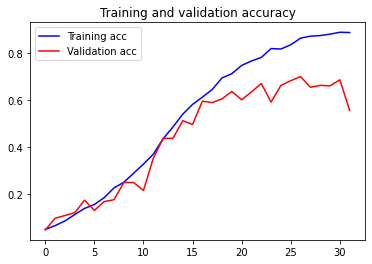

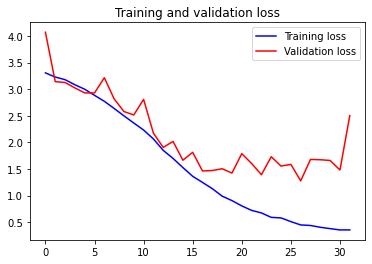

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Visualization

In [33]:
# evaluate_metrics = model.evaluate(test_df[''], )
# print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

In [34]:
# import numpy as np
# import os
# import cv2

In [35]:
# def load_test_data():
#     images = []
#     names = []
#     size = 224,224
#     for image in os.listdir(test_data):
#         print(image)
#         if image == '_classes.csv':
#             pass
#         temp = cv2.imread(test_data + '/' + image)
#         temp = cv2.resize(temp, size)
#         images.append(temp)
#         names.append(image)
#     images = np.array(images)
#     images = images.astype('float32')/255.0
#     return images, names

# test_images, test_img_names = load_test_data()

In [36]:
# model
# evaluate = model.evaluate(
#     test_gen)

In [37]:
# predictions = [model.predict(image.reshape(1,224,224,3))[0] for image in test_images]
# predictions=np.argmax(predictions,axis=1)

In [38]:
# labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
#                    'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
#                    'Z':25,'space':26,'del':27,'nothing':28}

In [39]:
# def get_labels_for_plot(predictions):
#     predictions_labels = []
#     for i in range(len(predictions)):
#         for ins in labels_dict.values():
#             if predictions[i] == ins:
#                 predictions_labels.append(ins)
#                 break
#     return predictions_labels

# predictions_labels_plot = get_labels_for_plot(predictions)

In [40]:
# predfigure = plt.figure(figsize = (13,13))
# def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
#     fig.add_subplot(row, col, index)
#     plt.axis('off')
#     plt.imshow(image)
#     title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
#     plt.title(title)
#     return

# image_index = 0
# row = 5
# col = 6
# for i in range(1,(row*col-1)):
#     plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
#     image_index = image_index + 1
# plt.show()
